# Churn Prediction

**Churn Prediction**, ou previsão de rotatividade de clientes, é uma técnica que utiliza **análises de dados para prever quais clientes têm maior probabilidade de cancelar um serviço** ou deixar de comprar um produto. Essa técnica é amplamente utilizada por empresas de diversos setores, como telecomunicações, varejo, serviços financeiros e tecnologia, para evitar a perda de clientes e melhorar a satisfação e fidelização dos mesmos.
A previsão de churn é importante porque a **rotatividade** de clientes pode ser **prejudicial** para uma empresa, podendo resultar em **perda de receitas**, **redução da participação de mercado** e **aumento dos custos de aquisição de clientes**. Além disso, a perda de clientes pode ser um sinal de **problemas em processos de atendimento** ao cliente ou produtos, que podem ser **corrigidos** para **melhorar a qualidade geral da empresa**.

<p align = "center">
<img src="Arquivos/churn.jpg" width=80%>
</p>

Ao prever quais clientes são mais propensos a cancelar um serviço ou deixar de comprar um produto, as empresas podem tomar **medidas preventivas para reduzir a rotatividade**. Isso pode incluir a criação de campanhas de retenção, melhoria da experiência do cliente e oferta de incentivos para permanecerem clientes.
**O objetivo do projeto é prever o churn utilizando avaliações estatísticas e algoritmos de Machine Learning.** Com isso, visamos **ajudar a empresa a entender melhor seus clientes e suas necessidades**, **identificar problemas** em seus processos de atendimento ao cliente ou produtos e **implementar melhorias significativas** em toda a empresa. Isso pode levar a uma **melhoria da experiência do cliente** e **aumentar a fidelização** e **satisfação do cliente**, resultando em uma **redução da rotatividade** e um **aumento das receitas**.



## Aquisição dos Dados

Os dados utilizados neste projeto foram originalmente disponibilizados na [plataforma de ensino da IBM Developer](https://developer.ibm.com/technologies/data-science/patterns/predict-customer-churn-using-watson-studio-and-jupyter-notebooks/#), e tratam de um problema típico de uma companhia de telecomunicações. O *dataset* completo pode ser encontrado [neste link](https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/WA_Fn-UseC_-Telco-Customer-Churn.csv).

Apesar de não haver informações explícitas disponíves, os nomes das colunas permitem um entendimento a respeito do problema.

In [740]:
# Importação de bibliotecas básicas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Importação de bibliotecas para machine learning e pré-processamento
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split, RepeatedKFold
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Importação de bibliotecas para visualização de resultados
import scikitplot as skplt

# Importação de bibliotecas para classificadores
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

# Importação de bibliotecas para balanceamento de classes
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler

# Importação de bibliotecas para métricas de avaliação
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, accuracy_score, recall_score, precision_score

In [741]:
# importar os dados
DATA_PATH = "https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/WA_Fn-UseC_-Telco-Customer-Churn.csv"
df = pd.read_csv(DATA_PATH)

## Análise dos Dados

Esta etapa tem por objetivo permitir um entendimento de como os dados estão estruturados.

**Dicionário das variáveis**
* `customerID`: identificador único do cliente
* `gender`: gênero do cliente (Male/Female)
* `SeniorCitizen`: variável binária que indica se o cliente é idoso ou aposentado (1) ou não (0)
* `Partner`: variável binária que indica se o cliente tem um parceiro (Yes) ou não (No)
* `Dependents`: variável binária que indica se o cliente tem dependentes (Yes) ou não (No)
* `tenure`: quantidade de meses que o cliente tem sido um assinante dos serviços da empresa
* `PhoneService`: variável binária que indica se o cliente tem serviço de telefone (Yes) ou não (No)
* `MultipleLines`: variável que indica se o cliente tem várias linhas telefônicas (Yes), uma única linha (No) ou nenhum serviço de telefone (No phone service)
* `InternetService`: variável que indica se o cliente tem serviço de internet com fibra óptica (Fiber optic), com a tecnologia DSL (DSL) ou sem serviço de internet (No)
* `OnlineSecurity`: variável que indica se o cliente tem segurança online (Yes), sem serviço de internet (No internet service) ou sem serviço de segurança (No)
* `OnlineBackup`: variável que indica se o cliente tem backup online (Yes), sem backup (No) ou sem serviço de internet (No internet service)
* `DeviceProtection`: variável que indica se o cliente tem proteção de dispositivo (Yes), sem proteção (No) ou sem serviço de internet (No internet service)
* `TechSupport`: variável que indica se o cliente tem suporte técnico (Yes), sem suporte (No) ou sem serviço de internet (No internet service)
* `StreamingTV`: variável que indica se o cliente tem serviço de streaming de TV (Yes), sem serviço de streaming de TV (No) ou sem serviço de internet (No internet service)
* `StreamingMovies`: variável que indica se o cliente tem serviço de streaming de filmes (Yes), sem serviço de streaming de filmes (No) ou sem serviço de internet (No internet service)
* `Contract`: variável que indica o tipo de contrato que o cliente tem com a empresa (Mensal, anual ou bianual)
* `PaperlessBilling`: variável binária que indica se o cliente optou por fatura eletrônica (Yes) ou não (No)
* `PaymentMethod`: variável que indica o método de pagamento que o cliente usa (Transferência bancária automática, Cartão de crédito automático, Cheque eletrônico ou Cheque enviado)
* `MonthlyCharges`: valor mensal cobrado ao cliente
* `TotalCharges`: valor total cobrado do cliente durante o tempo que foi assinante
* `Churn`: variável binária que indica se o cliente cancelou o serviço (Yes) ou não (No)

## Análise Exploratória dos Dados

Na análise exploratória de dados será efetuada uma explanação inicial das variáveis contidas na dataset, e entenderemos dados referentes a:

* *Contexto geral das variáveis*
* *Porcentagem de itens nulos*
* *Balanceamento do dataset*
* *Cancelamento em relação ao gênero*
* *Cancelamento em relação ao valor pago mensalmente*
* *Boxplot para variáveis numéricas*


Primeiramente, observaremos como estão dispostas as cinco primeiras entradas do dataset para ter uma visão ampla da estrutura de dados.

In [742]:
# Ver as 5 primeiras entradas
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [743]:
# Visualizar o tamanho do dataframe
print("Entradas: ", df.shape[0])
print("Variáveis: ", df.shape[1])

Entradas:  7043
Variáveis:  21


In [744]:
# Extrair o nome das colunas
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [745]:
# Extrair o tipo das variáveis
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

Pode-se perceber que a variável `TotalCharges`, que representa o **valor total** que foi cobrado ao cliente, está como object, mas deveria ser **float**. Não é possível fazer a conversão imediata pois há uma string ' ' que representa a ausência de valores. Portanto, a mudança será feita por uma função.

In [746]:
def converter_str_float(entrada):
    """
    Converte um objeto do tipo string em float.

    # Arguments
        entrada: string, string da coluna TotalCharges.

    # Returns
        Valor convertido em float, caso permita a conversão.
        NaN, caso o valor não seja apropriado.
    """

    try:
        return float(entrada)
    except ValueError:
        return np.nan

In [747]:
df.TotalCharges = df.TotalCharges.map(converter_str_float)

In [748]:
df.TotalCharges.isna().sum()

11

A coluna foi convertida, onde 11 valores estavam nulos, irei preencher os mesmos com a mediana e por fim, extrair o tipo da variável e a porcentagem de itens nulos.

In [749]:
df.TotalCharges.fillna(df.TotalCharges.median(), inplace = True)

In [750]:
# Extrair o tipo das variáveis
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

Podemos perceber que a coluna `TotalCharges` agora é de fato um float.

In [751]:
# Porcentagem de itens nulos
round((df.isnull().sum()/df.shape[0]).sort_values(ascending = True) * 100,2)

customerID          0.0
MonthlyCharges      0.0
PaymentMethod       0.0
PaperlessBilling    0.0
Contract            0.0
StreamingMovies     0.0
StreamingTV         0.0
TechSupport         0.0
DeviceProtection    0.0
TotalCharges        0.0
OnlineBackup        0.0
InternetService     0.0
MultipleLines       0.0
PhoneService        0.0
tenure              0.0
Dependents          0.0
Partner             0.0
SeniorCitizen       0.0
gender              0.0
OnlineSecurity      0.0
Churn               0.0
dtype: float64

A porcentagem de itens nulos é 0% para todas as colunas.

In [752]:
# Quantidade de dados distribuidos por classes
df.Churn.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [753]:
# Porcentagem de dados distribuidos por classes
round(df.Churn.value_counts()/df.shape[0] * 100,4)

No     73.463
Yes    26.537
Name: Churn, dtype: float64

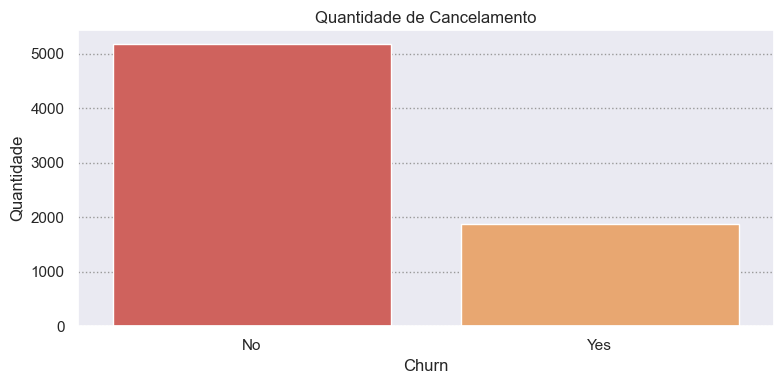

In [754]:
# Plotar um gráfico de barras para ver o balanceamento do *dataset*
fig, ax = plt.subplots(figsize=(8, 4))
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})
sns.set_palette(sns.color_palette("Spectral"))
count = df['Churn'].value_counts()
sns.countplot(x='Churn', data=df)
ax.set_xlabel('Churn')
ax.set_ylabel('Quantidade')
ax.set_title('Quantidade de Cancelamento');
plt.tight_layout()

O dataset é  **desbalanceado**, com 26,53% de churn. Uma consequência de ter dados desbalanceados é um **modelo enviesado**, que privilegia a classe maioritária. Logo, é necessário um **balanceamento** a fim de construir um modelo eficaz ao problema. Verificaremos agora se há um **balanceamento entre os gêneros** e se há relação entre **gênero e cancelamento**.


In [755]:
# Quantidade de dados distribuidos por classes
df.gender.value_counts()

Male      3555
Female    3488
Name: gender, dtype: int64

In [756]:
# Porcentagem de dados distribuidos por classes
round(df.gender.value_counts()/df.shape[0] * 100,4)

Male      50.4756
Female    49.5244
Name: gender, dtype: float64

In [757]:
# Taxa de cancelamento por gênero
df['gender'].loc[df.Churn == 'Yes'].value_counts()/df.gender.value_counts() * 100

Female    26.920872
Male      26.160338
Name: gender, dtype: float64

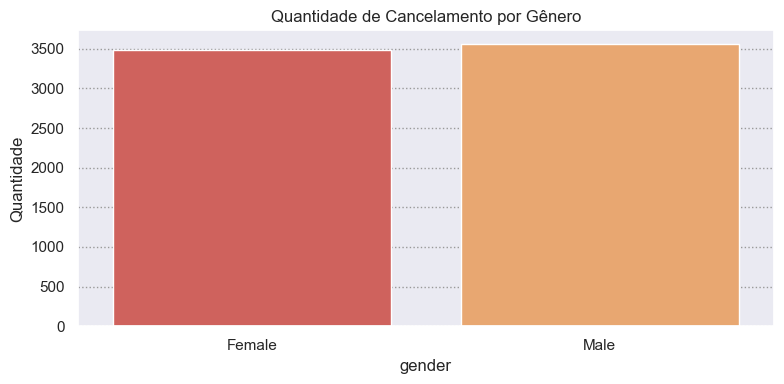

In [758]:
# Plotar um gráfico de barras para ver a quantidade de canelamento por gênero
fig, ax = plt.subplots(figsize=(8, 4))
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})
sns.set_palette(sns.color_palette("Spectral"))
count = df['gender'].loc[df.Churn == 'Yes'].value_counts()
sns.countplot(x='gender', data=df)
ax.set_xlabel('gender')
ax.set_ylabel('Quantidade')
ax.set_title('Quantidade de Cancelamento por Gênero');
plt.tight_layout()

Há medidas bastante semelhante, a quantidade de mulheres e homens está **balanceada**, e não há mudança significativa na taxa de cancelamento observando o gênero do cliente. Verificaremos agora se há uma relação entre o tipo de **contrato** e a quantidade de cancelamento.

In [759]:
df.Contract.loc[df.Churn == 'Yes'].value_counts()/df.Contract.value_counts() * 100

Month-to-month    42.709677
One year          11.269518
Two year           2.831858
Name: Contract, dtype: float64

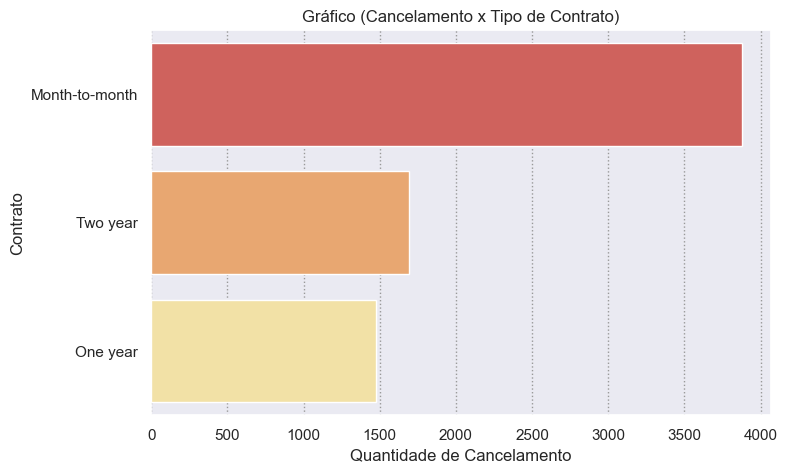

In [760]:
# plotar gráficos para as informações obtidas
fig, ax = plt.subplots(1, 1, figsize=(8,5))


# define informações iniciais referentes à coloração
sns.set(style="whitegrid", color_codes=True)
sns.set_palette(sns.color_palette("Spectral"))


# gráfico da média de preço por distrito
ax = sns.barplot(x=list(df.Contract.value_counts().values), y=list(df.Contract.value_counts().index), order= df.Contract.value_counts().sort_values(ascending = False).index, ax = ax)
ax.set_xlabel('Quantidade de Cancelamento')
ax.set_ylabel('Contrato')
ax.set_title("Gráfico (Cancelamento x Tipo de Contrato)");



Podemos perceber que de modo geral, os **contratos mensais** tendem a ter maior quantidade de **evasão** que os anuais e bianuais, que seguem a uma quantidade semelhante. Para confirmar a hipótese realizarei um teste de hipóteses a fim de verificar se a média das categorias são iguais.

In [761]:
import pandas as pd
from scipy.stats import chi2_contingency

# Crie uma tabela de contingência
table = pd.crosstab(df['Churn'], df['Contract'])

# Execute o teste de Qui-Quadrado
chi2, _, _, expected = chi2_contingency(table)

print(f"Valor de Qui-Quadrado: {chi2}")
print(f"p-valor: {p}")

# Calcule os residuais padronizados
residuals = (table - expected) / expected**0.5

print(residuals)

Valor de Qui-Quadrado: 1184.5965720837926
p-valor: 5.863038300673391e-258
Contract  Month-to-month   One year   Two year
Churn                                         
No            -11.745831   6.836504  11.386567
Yes            19.543049 -11.374770 -18.945295


Em resumo:

* Clientes com contratos Month-to-month são mais propensos a churn (Yes Churn) do que o esperado.
* Clientes com contratos de One year são menos propensos a churn (Yes Churn) do que o esperado.
* Clientes com contratos de Two year também são menos propensos a churn (Yes Churn) do que o esperado.

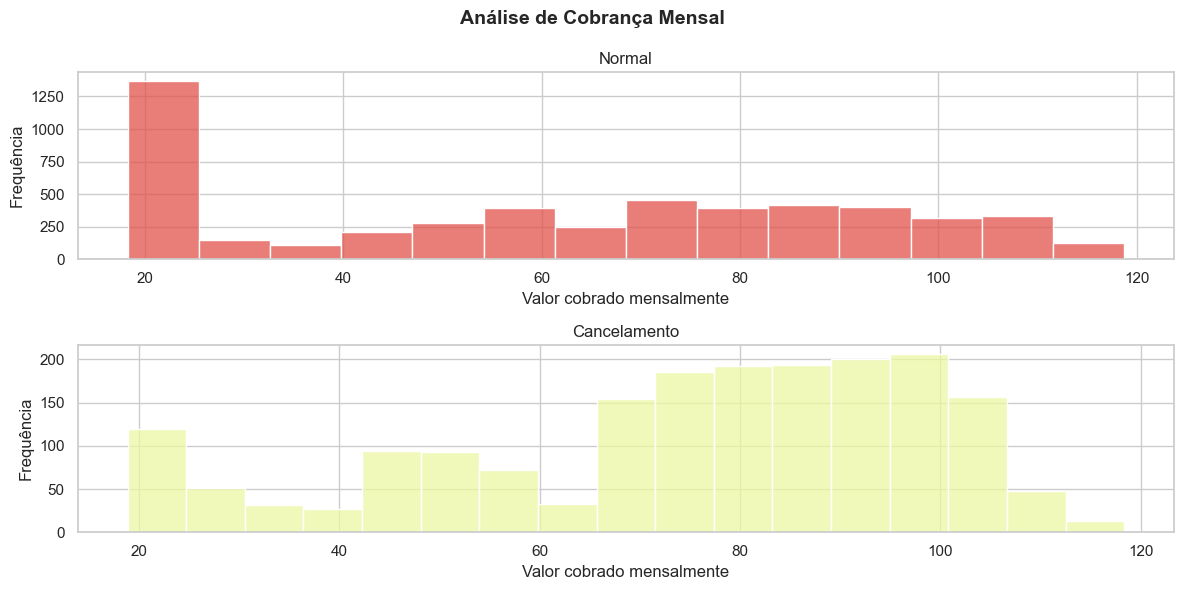

In [762]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(12,6))
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})
sns.set_palette(sns.color_palette("Spectral"))
sns.histplot(data=df.MonthlyCharges.loc[df.Churn == 'No'], kde=False, ax = ax[0], color=sns.color_palette()[0])
sns.histplot(data=df.MonthlyCharges.loc[df.Churn == 'Yes'], kde=False, ax = ax[1], color=sns.color_palette()[3])
ax[0].set_xlabel('Valor cobrado mensalmente')
ax[0].set_ylabel('Frequência')
ax[0].set_title('Normal');

ax[1].set_xlabel('Valor cobrado mensalmente')
ax[1].set_ylabel('Frequência')
ax[1].set_title('Cancelamento');

fig.suptitle("Análise de Cobrança Mensal", fontsize=14, fontweight='bold')
plt.tight_layout()


Iremos realizar um teste de hipóteses para entender se há relação entre o valor cobrado e a quantidade de cancelamentos.
Primeiro, é necessário realizar um teste de hipóteses para variância.

* H0: As variâncias são iguais
* HA: As variâncias diferem

In [763]:
print("Variância Normal:",df.MonthlyCharges.loc[df.Churn == 'No'].var())
print("Variância Churn:", df.MonthlyCharges.loc[df.Churn == 'Yes'].var())

Variância Normal: 966.7527670734264
Variância Churn: 608.4141833954307


In [764]:
X = df.MonthlyCharges.loc[df.Churn == 'No']
Y = df.MonthlyCharges.loc[df.Churn == 'Yes']
df1 = len(X) - 1 #grau de liberdade da primeira amostra
df2 = len(Y) - 1 #grau de liberdade da segunda amostra
F = X.var() / Y.var() #A maior variância tem que ir no numerador!
alpha = 0.05
p_value = 1 - scipy.stats.f.cdf(F, df1, df2)
print("P-valor:", p_value)

P-valor: 1.1102230246251565e-16


Como p-valor < 0.05, rejeita-se a hipótese nula.

In [765]:
print("Média Normal:",df.MonthlyCharges.loc[df.Churn == 'No'].mean())
print("Média Churn:", df.MonthlyCharges.loc[df.Churn == 'Yes'].mean())

Média Normal: 61.26512369540008
Média Churn: 74.44133226324237


Iremos realizar um teste de hipóteses para verificar se a média de preço quando há um churn é igual a média de preço quando não há cancelamentos.

H0: média1 = média2
HA: média1 != média2

In [766]:
X = df.MonthlyCharges.loc[df.Churn == 'No']
Y = df.MonthlyCharges.loc[df.Churn == 'Yes']
stats.ttest_ind(a=X, b=Y, equal_var=False)

Ttest_indResult(statistic=-18.407526676414673, pvalue=8.59244933154705e-73)

Como p-valor < 0.05, a 95% de nível de confiança pode-se concluir que quando **há cancelamento**, os **valores** cobrados **mensalmente** são **maiores**. Isso pode acontecer por diversos motivos, como por exemplo:

* Insatisfação com o produto ou serviço: quando o cliente não está satisfeito com o produto ou serviço oferecido pela empresa, ele pode cancelar e procurar um concorrente.

* Mudança na situação financeira: quando o cliente enfrenta problemas financeiros, pode precisar cortar gastos e optar por cancelar um serviço que considera menos essencial.

* Ofertas melhores da concorrência: quando o cliente encontra um produto ou serviço semelhante a um preço mais baixo ou com melhores condições em outra empresa, pode optar por cancelar o serviço atual e migrar para a concorrência.

Logo, o **preço da mensalidade é uma variável relevante**.

A variável `SeniorCitizen` indica se o cliente é idoso ou aposentado. A variável `tenure` diz respeito a quantidade de meses que o cliente tem sido um assinante dos serviços da empresa. A variável `MonthlyCharges` diz respeito ao quanto o cliente paga mensalmente pelo produto e `TotalCharges` ao valor total que foi pago enquanto assinante. A seguir um gráfico em boxplot que trará algumas informações estatísticas a respeito das variáveis.

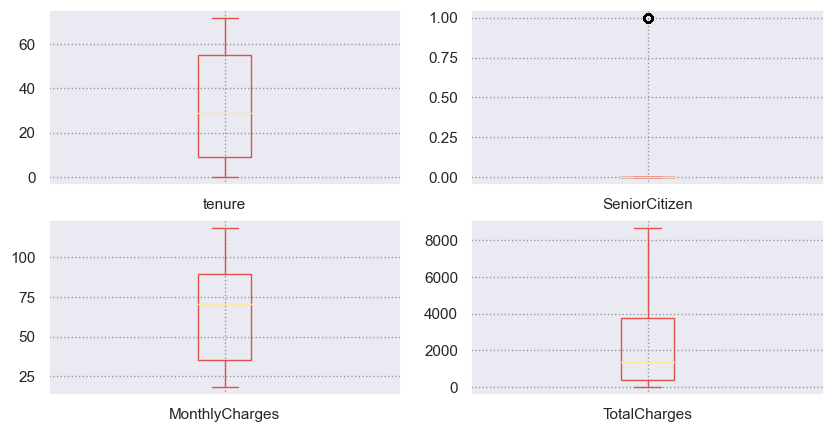

In [767]:
fig, axs = plt.subplots(2, 2, figsize=(10,5))
ax1 = axs[0, 0]
ax2 = axs[0, 1]
ax3 = axs[1, 0]
ax4 = axs[1, 1]
df.tenure.plot(kind = "box", ax = ax1)
df.SeniorCitizen.plot(kind = "box", ax = ax2)
df.MonthlyCharges.plot(kind = "box", ax = ax3)
df.TotalCharges.plot(kind = "box", ax = ax4);

Estatisticamente não há outliers na variáveis ou alguma informação discrepante. O tempo médio de utilizado do produto pelo usuário foi de aproximadamente 30 meses, já a mensalidade foi 70 e o valor total pago 1397. Os dados são coerentes.

Verificaremos agora se há algum dado altamente correlacionado com a correlação de Pearson. Isso é importante porque características altamente correlacionadas podem causar multicolinearidade em alguns modelos de aprendizado de máquina, o que, por sua vez, pode tornar o modelo instável e os coeficientes dessas características difíceis de interpretar. Além disso, a redundância nas características pode levar a um excesso de ajuste (overfitting), onde o modelo aprende demais com os dados de treinamento e tem um desempenho inferior em dados novos e não vistos. Eliminando ou combinando características correlacionadas, podemos construir um modelo mais robusto e eficiente que generaliza melhor para novos dados.

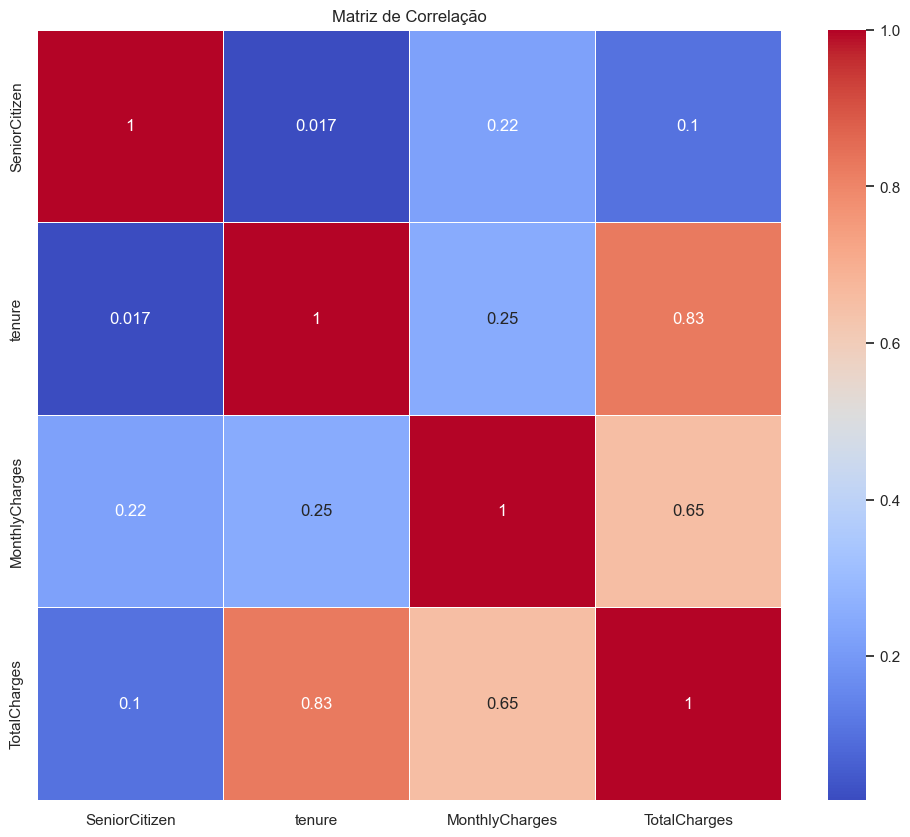

Features removidas: []


In [768]:
correlation_matrix = df.corr()

# Visualizando a matriz de correlação usando um heatmap
plt.figure(figsize=(12,10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Matriz de Correlação")
plt.show()

# Identifique e remova características altamente correlacionadas
threshold = 0.85
to_drop = []

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            colname = correlation_matrix.columns[i]
            to_drop.append(colname)

df_dropped = df.drop(columns=to_drop)

print(f"Features removidas: {to_drop}")

## Conjunto de Treino e Teste

É importante separar o conjunto de treino e teste antes do pré-processamento porque isso evita o vazamento de dados ("data leakage"). O vazamento de dados ocorre quando informações do conjunto de teste, que deve idealmente simular dados novos e não vistos, influenciam de alguma forma o processo de treinamento do modelo. Se o pré-processamento for feito antes da divisão, qualquer transformação, normalização ou codificação será baseada na distribuição e nas características de todo o conjunto de dados, incluindo o conjunto de teste. Isso pode dar uma visão otimista e muitas vezes enganosa do desempenho do modelo, pois o modelo estará sendo avaliado com base em informações que, indiretamente, já "viu" durante o treinamento. Ao separar os conjuntos de treino e teste primeiro, garantimos que o modelo seja treinado apenas com as informações do conjunto de treino e seja validado de maneira justa com o conjunto de teste, que representa dados novos para o modelo.

#### Separando o conjunto de teste

In [769]:
df_clean = df.copy()

# criando o conjunto de teste
test = df_clean.sample(frac=0.15, random_state=0)

# verificando o conjunto
print(test.shape)
test.head()

(1056, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2200,6296-DDOOR,Female,0,No,No,19,Yes,No,DSL,No,...,No,No,Yes,No,One year,No,Electronic check,58.20,1045.25,No
4627,3680-CTHUH,Male,0,No,No,60,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Credit card (automatic),116.60,7049.50,No
3225,4931-TRZWN,Female,0,No,No,13,Yes,No,DSL,Yes,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,71.95,923.85,No
2828,8559-WNQZS,Male,0,No,No,1,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.45,20.45,No
3768,3537-HPKQT,Female,0,Yes,No,55,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Credit card (automatic),77.75,4266.40,No


In [770]:
# drop das linhas de teste
df_clean = df_clean.drop(test.index)

# verificando o shape do df
df_clean.shape

(5987, 21)

In [771]:
# resetando o index dos conjuntos
df_clean.reset_index()
test.reset_index()

,index,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,2200,6296-DDOOR,Female,0,No,No,19,Yes,No,DSL,...,No,No,Yes,No,One year,No,Electronic check,58.20,1045.25,No
1,4627,3680-CTHUH,Male,0,No,No,60,Yes,Yes,Fiber optic,...,Yes,Yes,Yes,Yes,One year,Yes,Credit card (automatic),116.60,7049.50,No
2,3225,4931-TRZWN,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,71.95,923.85,No
3,2828,8559-WNQZS,Male,0,No,No,1,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.45,20.45,No
4,3768,3537-HPKQT,Female,0,Yes,No,55,Yes,Yes,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Credit card (automatic),77.75,4266.40,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1051,2229,3496-LFSZU,Male,0,Yes,No,4,Yes,No,Fiber optic,...,No,No,No,No,Month-to-month,No,Electronic check,70.50,294.20,No
1052,5109,7113-HIPFI,Male,0,Yes,Yes,66,Yes,No,DSL,...,Yes,Yes,No,No,Two year,No,Mailed check,65.85,4097.05,No
1053,5365,0847-HGRML,Male,0,No,Yes,62,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),20.00,1250.10,No
1054,3903,5206-XZZQI,Male,0,No,No,53,Yes,No,Fiber optic,...,No,Yes,No,No,Month-to-month,Yes,Mailed check,80.60,4348.10,No


## Preparar os Dados

Nesta etapa de preparação dos dados, será realizado um **pré-processamento básico**, apenas com a finalidade de construir um modelo base. 

As features que continham 2 labels únicos, serão processadas usando-se o `LabelEncoder`, também irei utilizá-la para a variável `Contract` que se demonstrou relevante. Na sequência, serão separadas as variáveis numéricas das categóricas. As categóricas serão transformadas em variáveis dummy, para permitir a sua utilização em todos os modelos. O Label Encoding atribui um número inteiro a cada categoria exclusiva de uma variável categórica, com valores maiores para categorias que são consideradas mais importantes. O Dummy Encoding, por outro lado, transforma cada categoria exclusiva de uma variável categórica em uma nova variável binária (0 ou 1), indicando a presença ou ausência dessa categoria na observação

Iremos remover a variável `customerID`, pois se trata apenas de um número de identificação, não sendo relevante ao modelo. Também irei remover a variável `gender` pois não demonstrou relevância em relação à variável alvo.

In [772]:
# remover customerID e gender
df_clean = df.drop('customerID', axis = 1)
df_clean = df_clean.drop('gender', axis = 1)
df_clean.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [773]:
# Cria um dicionário para guardar cada LabelEncoder por coluna
encoders = {}

cols_to_encode = ['SeniorCitizen','Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Contract', 'Churn']
for col in cols_to_encode:
    le = LabelEncoder()
    df_clean[col] = le.fit_transform(df_clean[col])
    encoders[col] = le  # salva o encoder ajustado para uso posterior

# Variáveis dummy
cols_to_encode = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 
                  'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 
                  'PaymentMethod']
df_dummies = pd.get_dummies(df_clean[cols_to_encode], prefix=cols_to_encode)
df_clean = pd.concat([df_clean, df_dummies], axis=1)
df_clean.drop(cols_to_encode, axis=1, inplace=True)

In [774]:
df_clean.columns

Index(['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService',
       'Contract', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges',
       'Churn', 'MultipleLines_No', 'MultipleLines_No phone service',
       'MultipleLines_Yes', 'InternetService_DSL',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No', 'OnlineSecurity_No internet service',
       'OnlineSecurity_Yes', 'OnlineBackup_No',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No', 'DeviceProtection_No internet service',
       'DeviceProtection_Yes', 'TechSupport_No',
       'TechSupport_No internet service', 'TechSupport_Yes', 'StreamingTV_No',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'Paym

In [775]:
df_clean.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,1,0,0,1,29.85,29.85,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,34,1,1,0,56.95,1889.50,0,...,1,0,0,1,0,0,0,0,0,1
2,0,0,0,2,1,0,1,53.85,108.15,1,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,45,0,1,0,42.30,1840.75,0,...,1,0,0,1,0,0,1,0,0,0
4,0,0,0,2,1,0,1,70.70,151.65,1,...,1,0,0,1,0,0,0,0,1,0


### Padronizar `tenure`, `MonthlyCharges` e `TotalCharges`

O objetivo do pré-processamento de dados é garantir que as features estejam na mesma escala, garantindo um desempenho melhor do algoritmo de *machine learning*. Para padronizar as variáveis `tenure`, `MonthlyCharges` e `TotalCharges` será utilizado o *StandardScaler*. Ele ajusta os dados para que tenham uma média zero e um desvio padrão de um.

In [776]:
# Padronizar as colunas
std_scaler = StandardScaler()
df_new = df_clean.copy()
df_new['std_tenure'] = std_scaler.fit_transform(df_clean['tenure'].values.reshape(-1, 1))
df_new['std_MonthlyCharges'] = std_scaler.fit_transform(df_clean['MonthlyCharges'].values.reshape(-1, 1))
df_new['std_TotalCharges'] = std_scaler.fit_transform(df_clean['TotalCharges'].values.reshape(-1, 1))
df_new.drop(['tenure', 'MonthlyCharges', 'TotalCharges'], axis=1, inplace=True)

# ver as primeiras entradas
df_new.head()

,SeniorCitizen,Partner,Dependents,PhoneService,Contract,PaperlessBilling,Churn,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,std_tenure,std_MonthlyCharges,std_TotalCharges
0,0,1,0,0,0,1,0,0,1,0,...,1,0,0,0,0,1,0,-1.277445,-1.160323,-0.994242
1,0,0,0,1,1,0,0,1,0,0,...,1,0,0,0,0,0,1,0.066327,-0.259629,-0.173244
2,0,0,0,1,0,1,1,1,0,0,...,1,0,0,0,0,0,1,-1.236724,-0.362660,-0.959674
3,0,0,0,0,1,0,0,0,1,0,...,1,0,0,1,0,0,0,0.514251,-0.746535,-0.194766
4,0,0,0,1,0,1,1,1,0,0,...,1,0,0,0,0,1,0,-1.236724,0.197365,-0.940470


Com o conjunto de teste devidamente separado, e os dados posteriores padronizados, iremos criar o conjunto de treino e validação. Utilizaremos o teste para validar o modelo ao final.

In [777]:
# separar variáveis entre X e y
X = df_new.drop('Churn', axis=1)
y = df_new['Churn'] # variável alvo

# dividir o dataset entre treino e validação
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, shuffle=True, test_size = 0.15)

## Modelo Baseline

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1589, number of negative: 4397
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000295 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 653
[LightGBM] [Info] Number of data points in the train set: 5986, number of used features: 37
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265453 -> initscore=-1.017818
[LightGBM] [Info] Start training from score -1.017818


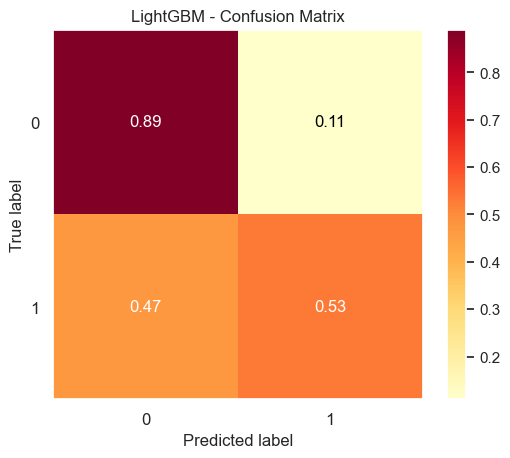

Métricas de avaliação do modelo Baseline Model:
Acurácia: 0.79
Precisão: 0.63
Recall: 0.53
ROC AUC: 0.71
Average Precision: 0.46



In [778]:
import lightgbm as lgb

# Criando o dataset no formato LightGBM
dtrain = lgb.Dataset(X_train, label=y_train)

# Definindo os parâmetros
params = {
    'objective': 'binary',
    'metric': 'binary_logloss',
    'boosting_type': 'gbdt',
    'random_state': 42
}

# Treinar o modelo
clf = lgb.train(params, dtrain, 100)

# Fazer previsões
y_pred_prob = clf.predict(X_test)
y_pred = np.round(y_pred_prob)

skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True, cmap='YlOrRd')
plt.title("LightGBM - Confusion Matrix")
plt.show()

from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, average_precision_score

def display_metrics(model_name, y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    avg_precision = average_precision_score(y_test, y_pred)
    
    print(f"Métricas de avaliação do modelo {model_name}:")
    print("Acurácia: {:.2f}".format(accuracy))
    print("Precisão: {:.2f}".format(precision))
    print("Recall: {:.2f}".format(recall))
    print("ROC AUC: {:.2f}".format(roc_auc))
    print("Average Precision: {:.2f}\n".format(avg_precision))
    


display_metrics("Baseline Model", y_test, y_pred)

## Balanceamento de Dados

### Amostragem

Um dataset que possua mais de 50% das entradas em uma classe já é considerado desbalanceado. A maioria dos algoritmos de aprendizado de máquina funcionam bem com conjuntos de dados equilibrados, uma vez que eles buscam otimizar a precisão geral da classificação ou medidas relacionadas. Para dados **desbalanceados**, os limites de decisões estabelecidos por padrão nos algoritmos tendem a ser **enviesados em torno da classe majoritária**. Portanto a **classe minoritária tende a ser classificada incorretamente.**

Uma maneira de corrigir o problema é por meio de **amostragem** que contém duas técnicas. A técnica de **over-sampling**, consiste em **gerar novos exemplos para a classe minoritária**, de forma a aumentar sua representatividade no conjunto de dados. Já o **under-sampling** **remove** instâncias da **classe majoritária**.

Esses métodos de amostragem, no entanto, possuem **diversas desvantagens** (Weiss, 2004). O under-sampling descarta a exemplos da classe majoritária potencialmente úteis e pode, portanto, degradar o desempenho do classificador. Como o over-sampling introduz casos de treinamento adicionais, pode aumentar o tempo necessário para construir um classificador, e levar a casos de overfitting.

Além disso, **over-sampling simples não introduzem novos dados**, apenas replicam, portanto não tratam efetivamente a "falta de dados". A literatura mostra que o simples over-sampling é ineficaz para melhorar o reconhecimento da classe minoritária (Ling & Li, 1998; Drummond & Holte, 2003) e por que o under-sampling parece ter vantagem sobre o over-sampling  (Chen et al., 2004). Por essas razões, neste estudo **utilizaremos o under-sampling**.


### RandomUnderSampler

O **RandomUnderSampler** é uma técnica de undersampling, usada para lidar com conjuntos de dados desbalanceados, onde uma das classes é muito menor do que as outras. A ideia por trás do undersampling é reduzir a quantidade de amostras da classe majoritária para equilibrar as proporções entre as classes. O RandomUnderSampler é uma técnica simples que **remove aleatoriamente amostras da classe majoritária** até que o número de amostras na classe majoritária corresponda ao número de amostras da classe minoritária. Essa técnica pode ser eficaz para reduzir o viés do modelo em direção à classe majoritária e melhorar a precisão das previsões para a classe minoritária.

In [779]:
# instanciando o RandomUnderSampler
rus = RandomUnderSampler(random_state=42, sampling_strategy="majority")

# aplicando o RandomUnderSampler ao conjunto de dados
X_under, y_under = rus.fit_resample(X_train, y_train)

Nas linhas acima foi criado o objeto para o RandomUnderSampler e os dados foram balanceados. Utilizou-se a estratégia de amostragem "majority" para apenas remover instâncias da classe majoritária. Observaremos agora o tamanho antigo da variável alvo e o novo.

In [780]:
# Visualizando o tamanho do conjunto de treinamento
print("Tamanho do y_train:", np.shape(y_train))

# Visualizando o tamanho do conjunto balanceado
print("Tamanho do y_resampled:", np.shape(y_under))

Tamanho do y_train: (5986,)
Tamanho do y_resampled: (3178,)


Pode-se observar que várias linhas foram removidas a fim de balancear os dados. Veremos a nova disposição.

In [781]:
# ver o balanceamento das classes
print(pd.Series(y_under).value_counts())

0    1589
1    1589
Name: Churn, dtype: int64


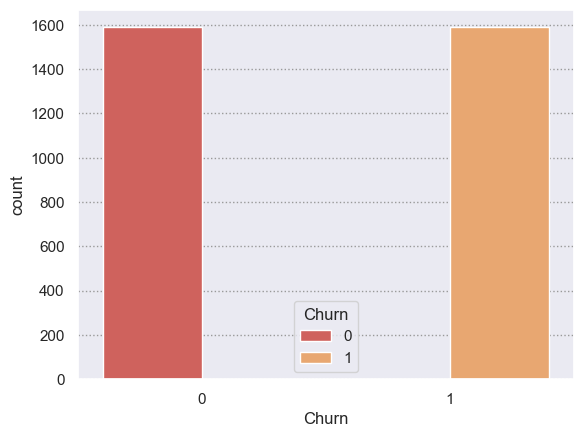

In [782]:
# plotar a nova distribuição de classes
sns.countplot(x=y_under, hue=y_under);

Temos então, os dados balanceados.

## Treinamento dos Algoritmos de *Machine Learning* 

Para o **treinamento** utilizaremos diversos algoritmos de Machine Learning. Para validar se tivemos um bom resultado com o treinamento, utilizaremos algumas **métricas** para modelos de classificação, como **matriz de confusão, acurácia, recall, precision e AUC.** Sendo priorizado o **recall**, que  é a **proporção de exemplos positivos que o modelo classificou corretamente em relação a todos os exemplos positivos.**

Serão instanciados objetos dos algoritmos abaixo, em seguida, eles serão treinados em validação cruzada para verificar qual tem o maior recall.


1. **DecisionTreeClassifier**:
   - **O que é**: Um classificador baseado em árvores de decisão. Funciona particionando o espaço de entrada de dados em regiões, e cada região é associada a uma classe específica.
   - **Uso típico**: Muito útil quando você quer entender a estrutura hierárquica dos dados ou a importância das características.
   - **Vantagens**: Fácil de visualizar e interpretar, não precisa de normalização, capaz de lidar com características numéricas e categóricas.
   - **Desvantagens**: Pode ser propenso a overfitting, especialmente com dados ruidosos ou quando a árvore é muito profunda.

2. **BalancedBaggingClassifier**:
   - **O que é**: Uma extensão do algoritmo de Bagging que trata do desbalanceamento de classes durante o processo de treinamento.
   - **Uso típico**: Útil quando lidamos com conjuntos de dados desbalanceados.
   - **Vantagens**: Reduz o problema do desbalanceamento ao reamostrar os dados em cada subconjunto, potencialmente melhorando o desempenho em classes minoritárias.
   - **Desvantagens**: Pode aumentar o risco de overfitting nas classes minoritárias se não for cuidadosamente regulado.

3. **BalancedRandomForestClassifier**:
   - **O que é**: Uma variação da floresta aleatória que cria árvores equilibradas através do reamostramento com ou sem substituição.
   - **Uso típico**: Assim como o BalancedBaggingClassifier, é útil para conjuntos de dados desbalanceados.
   - **Vantagens**: Combina os benefícios das florestas aleatórias (como redução da variância e aumento da robustez) com o reequilíbrio para tratar de conjuntos desbalanceados.
   - **Desvantagens**: Como qualquer técnica de reamostragem, pode levar a um overfitting em algumas situações.

4. **XGBClassifier (XGBoost)**:
   - **O que é**: Uma implementação otimizada de árvores de aumento de gradiente.
   - **Uso típico**: Muito popular em competições de ciência de dados devido à sua alta eficiência e desempenho.
   - **Vantagens**: Rápido, eficiente, pode ser paralelizado/distribuído, tem uma rotina regularizada (L1 e L2) que previne o overfitting.
   - **Desvantagens**: Pode ser sensível a ruídos, tem muitos hiperparâmetros para ajustar.

5. **LightGBM**:
   - **O que é**: Uma estrutura de aumento de gradiente que usa técnicas baseadas em árvores. É uma implementação que otimiza o uso da memória e a velocidade de treinamento.
   - **Uso típico**: Desempenho similar ao XGBoost, mas muitas vezes é mais rápido e usa menos memória.
   - **Vantagens**: Rápido, eficiente, suporta treinamento distribuído, otimizado para grandes conjuntos de dados, e pode lidar com dados categóricos sem precisar de codificação prévia.
   - **Desvantagens**: Assim como o XGBoost, possui muitos hiperparâmetros, e pode ser sensível a configurações de hiperparâmetros ou ruídos nos dados.

In [783]:
# Import necessary libraries
from sklearn.tree import DecisionTreeClassifier
from imblearn.ensemble import BalancedBaggingClassifier
from imblearn.ensemble import BalancedRandomForestClassifier
from xgboost import XGBClassifier
import lightgbm as lgb

# Define the classifiers
balanced_bagging = BalancedBaggingClassifier(base_estimator=DecisionTreeClassifier(),
                                            random_state=42)
balanced_rf = BalancedRandomForestClassifier(random_state=42)
xgboost = XGBClassifier(random_state=42)
lightgmb = lgb.LGBMClassifier(random_state=42)


A validação cruzada é uma técnica que permite avaliar o desempenho do modelo dividindo os dados em k partições (folds), treinando o modelo em k-1 partições e testando-o na partição restante, repetindo esse processo k vezes. Ela é usada para estimar a performance do modelo em dados não vistos e ajuda a evitar problemas de sobreajuste (overfitting) ou subajuste (underfitting). A utilizaremos durante o treinamento dos nossos modelos.

Baseado no paper **Handling class imbalance in customer churn prediction**, [disponível neste link](https://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.477.1151&rep=rep1&type=pdf), utilizaremos a técnica de 5x2 CV, onde foram utilizadas cinco iterações de validação cruzada de dois folders. Em cada iteração, os dados foram divididos aleatoriamente pela metade. Uma metade foi fornecida aos algoritmos e a outra metade foi usada para testar a solução final; e vice-versa.

In [784]:
# Creation of classifiers list
classifiers = [
    ('Balanced Bagging', balanced_bagging),
    ('Balanced Random Forest', balanced_rf),
    ('XGBoost', xgboost),
    ('LightGBM', lightgmb)
]

recall = []
model = []

# Cross-validation with two folders and 5 repetitions
cv = RepeatedKFold(n_splits=2, n_repeats=5, random_state=42)

X_under_np = X_under.to_numpy()
y_under_np = y_under.to_numpy()

for name, clf in classifiers:
    scores = []
    
    # Cross-validation
    for train_index, test_index in cv.split(X_under_np, y_under_np):
        # Data split into train and test
        X_train, X_test = X_under_np[train_index], X_under_np[test_index]
        y_train, y_test = y_under_np[train_index], y_under_np[test_index]

        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)

        # Calculate recall and add to scores list
        recall_iter = recall_score(y_test, y_pred, average='macro')
        scores.append(recall_iter)

    recall.append(np.mean(scores))
    model.append(name)
    
recall_sorted, model_sorted = zip(*sorted(zip(recall, model), reverse=True))
pd.DataFrame(data=recall_sorted, index=model_sorted, columns=['Recall'])

,Recall
Balanced Random Forest,0.741653
LightGBM,0.741426
XGBoost,0.728861
Balanced Bagging,0.720832


No código acima, foi realizado nos algoritmos a validação cruzada com a técnica 5x2 explicitada previamente. Também foi calculado a média do recall para cada algoritmo. Os algoritmos com melhor recall foram Balanced Random Forest e LightGBM, respectivamente. Agora irei otimizar os hiperparâmetros a fim de obter resultados ainda mais satisfatórios.

## Otimização dos Hiperparâmetros - Balanced Random Forest e LightGBM

Uma das formas mais comuns de otimizar os hiperparâmetros do modelo é utilizando o GridSearchCV do scikit-learn. O GridSearchCV é uma ferramenta que permite testar várias combinações de hiperparâmetros de um modelo, treinando e avaliando cada modelo para encontrar a melhor combinação de hiperparâmetros para o conjunto de dados em questão. 

O utilizaremos para encontrar os melhores parâmetros dos modelos de Machine Learning escolhidos.

In [785]:
# from sklearn.model_selection import GridSearchCV

# # For Balanced Random Forest
# param_grid_brf = {
#     'n_estimators': [10, 50, 100, 150],
#     'max_features': ['auto', 'sqrt', 'log2'],
#     'max_depth': [None, 10, 20, 30, 40],
# }

# grid_search_brf = GridSearchCV(BalancedRandomForestClassifier(random_state=42),
#                                param_grid=param_grid_brf,
#                                cv=5,
#                                scoring='recall_macro',
#                                n_jobs=-1)
# grid_search_brf.fit(X_under, y_under)
# best_brf = grid_search_brf.best_estimator_

# print("Best Parameters for Balanced Random Forest: ", grid_search_brf.best_params_)

# # For LightGBM
# param_grid_lgb = {
#     'num_leaves': [31, 62, 93],
#     'learning_rate': [0.01, 0.05, 0.1],
#     'n_estimators': [50, 100, 150],
# }

# grid_search_lgb = GridSearchCV(lgb.LGBMClassifier(random_state=42),
#                                param_grid=param_grid_lgb,
#                                cv=5,
#                                scoring='recall_macro',
#                                n_jobs=-1)
# grid_search_lgb.fit(X_under, y_under)
# best_lgb = grid_search_lgb.best_estimator_

# print("Best Parameters for LightGBM: ", grid_search_lgb.best_params_)


Os modelos foram treinados, abaixo realizaremos previsões no conjunto de teste e calcularemos métricas de avaliação.

### Balanced Random Forest & Light GBM

In [786]:
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb

# Treinando o modelo Balanced Random Forest com os melhores parâmetros
brf = RandomForestClassifier(max_depth=10, max_features='auto', n_estimators=100, class_weight='balanced')
brf.fit(X_train, y_train)

# Treinando o modelo LightGBM com os melhores parâmetros
lgbm = lgb.LGBMClassifier(learning_rate=0.01, n_estimators=150, num_leaves=31)
lgbm.fit(X_train, y_train)

y_pred_brf = brf.predict(X_test)
y_pred_lgbm = lgbm.predict(X_test)

from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, average_precision_score

def calculate_metrics(y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    avg_precision = average_precision_score(y_test, y_pred)
    return accuracy, precision, recall, roc_auc, avg_precision

accuracy_brf, precision_brf, recall_brf, roc_auc_brf, avg_precision_brf = calculate_metrics(y_test, y_pred_brf)
accuracy_lgbm, precision_lgbm, recall_lgbm, roc_auc_lgbm, avg_precision_lgbm = calculate_metrics(y_test, y_pred_lgbm)

print("Métricas de avaliação do modelo Balanced Random Forest:")
print("Acurácia: {:.2f}".format(accuracy_brf))
print("Precisão: {:.2f}".format(precision_brf))
print("Recall: {:.2f}".format(recall_brf))
print("ROC AUC: {:.2f}".format(roc_auc_brf))
print("Average Precision: {:.2f}".format(avg_precision_brf))
print("\n")
print("Métricas de avaliação do modelo LightGBM:")
print("Acurácia: {:.2f}".format(accuracy_lgbm))
print("Precisão: {:.2f}".format(precision_lgbm))
print("Recall: {:.2f}".format(recall_lgbm))
print("ROC AUC: {:.2f}".format(roc_auc_lgbm))
print("Average Precision: {:.2f}".format(avg_precision_lgbm))


Métricas de avaliação do modelo Balanced Random Forest:
Acurácia: 0.75
Precisão: 0.74
Recall: 0.77
ROC AUC: 0.75
Average Precision: 0.69


Métricas de avaliação do modelo LightGBM:
Acurácia: 0.74
Precisão: 0.73
Recall: 0.77
ROC AUC: 0.74
Average Precision: 0.68


**Resumo dos Resultados para o Conjunto de Treino de Churn Prediction:**

Ambos os modelos, Balanced Random Forest e LightGBM, apresentaram performances semelhantes no conjunto de treino para a tarefa de Churn Prediction. Os dois modelos são comparáveis em termos de desempenho. A escolha entre eles pode depender de considerações adicionais, como a importância das métricas para o problema de negócio específico ou outros fatores, como tempo de treinamento e recursos disponíveis.

Será plotado a matriz de confusão dos resultados obtidos.

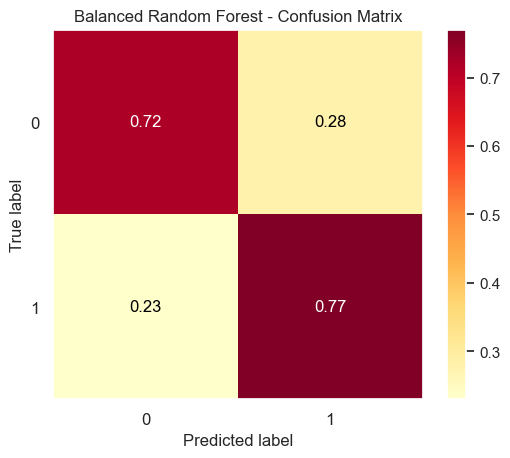

In [787]:
skplt.metrics.plot_confusion_matrix(y_test, y_pred_brf, normalize=True, cmap='YlOrRd')
plt.title("Balanced Random Forest - Confusion Matrix");

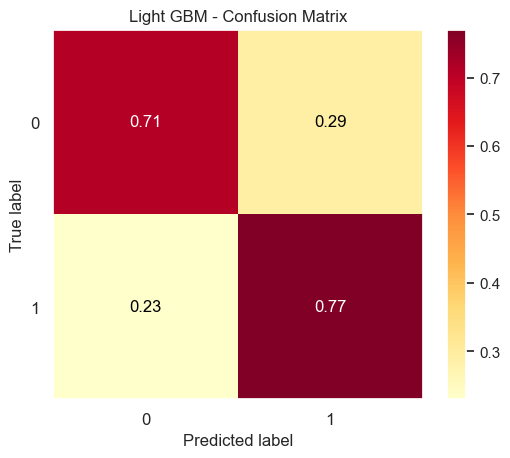

In [788]:
skplt.metrics.plot_confusion_matrix(y_test, y_pred_lgbm, normalize=True, cmap='YlOrRd')
plt.title("Light GBM - Confusion Matrix");

## Avaliação do Modelo Utilizando os Dados de Teste

No começo do projeto, realizamos um split nos dados para que tivéssemos 3 conjuntos: Um de treino, um de validação e um de teste. Agora que já exploramos e preparamos os dados, instaciamos o modelo e fizemos previsões no conjunto de validação, é hora de descobrirmos o potencial desse simples modelo com os dados de teste.

### Padronização no conjunto de teste

Antes de efetivamente testar os dados nos nossos classificadores, precisamos padronizar os modelos, de forma semelhante à padronização dos dados de treinamento. Faremos isso utilizando o StandardScarler. Logo em seguida, os dados serão separados em X_test e y_test, onde y_test irá conter a variável alvo.

In [789]:
# Remover colunas
test = test.drop(['customerID', 'gender'], axis=1)

cols_to_encode = ['SeniorCitizen','Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Contract', 'Churn']

# Usar encoders ajustados no treinamento
for col in cols_to_encode:
    le = encoders[col]
    test[col] = le.transform(test[col])

# Variáveis dummy
cols_to_encode = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 
                  'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 
                  'PaymentMethod']
test_dummies = pd.get_dummies(test[cols_to_encode], prefix=cols_to_encode)
test = pd.concat([test, test_dummies], axis=1)
test.drop(cols_to_encode, axis=1, inplace=True)

# Usar o scaler ajustado no treinamento
test['std_tenure'] = std_scaler.transform(test['tenure'].values.reshape(-1, 1))
test['std_MonthlyCharges'] = std_scaler.transform(test['MonthlyCharges'].values.reshape(-1, 1))
test['std_TotalCharges'] = std_scaler.transform(test['TotalCharges'].values.reshape(-1, 1))
test.drop(['tenure', 'MonthlyCharges', 'TotalCharges'], axis=1, inplace=True)

test.head()

,SeniorCitizen,Partner,Dependents,PhoneService,Contract,PaperlessBilling,Churn,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,std_tenure,std_MonthlyCharges,std_TotalCharges
2200,0,0,0,1,1,0,0,1,0,0,...,1,0,0,0,0,1,0,-0.999032,-0.981726,-0.545963
4627,0,0,0,1,1,1,0,0,0,1,...,0,0,1,0,1,0,0,-0.980931,-0.955944,2.104791
3225,0,0,0,1,0,1,0,1,0,0,...,0,0,1,0,0,1,0,-1.001681,-0.975656,-0.599559
2828,0,0,0,1,2,0,0,1,0,0,...,0,1,0,0,0,0,1,-1.006979,-0.998392,-0.998392
3768,0,1,0,1,0,1,0,0,0,1,...,1,0,0,0,1,0,0,-0.983139,-0.973095,0.876109


In [790]:
# separar variáveis entre X e y
X_test = test.drop('Churn', axis=1)
y_test = test['Churn']

### Balanceamento de dados

Verificaremos o balanceamento do conjunto de teste.

In [791]:
# tamanho dos dados de teste
test.shape

(1056, 38)

In [792]:
# balanceamento dos dados de teste
test.Churn.value_counts()

0    791
1    265
Name: Churn, dtype: int64

O conjunto de teste contém 1056 instâncias, sendo 791 referente à classe 0 (não há Churn) e 265 à classe 1 (há churn). Pode-se perceber que o **conjunto é desbalanceado**, haja vista que é uma amostra dos dados originais. É esperado que o nosso classificador apresente resultados satisfatórios e consiga distinguir bem ambas as classes.

Abaixo realizaremos previsões no conjunto de teste utilizando ambos os classificadores.

In [793]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, average_precision_score

def display_metrics(model_name, y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    avg_precision = average_precision_score(y_test, y_pred)
    
    print(f"Métricas de avaliação do modelo {model_name}:")
    print("Acurácia: {:.2f}".format(accuracy))
    print("Precisão: {:.2f}".format(precision))
    print("Recall: {:.2f}".format(recall))
    print("ROC AUC: {:.2f}".format(roc_auc))
    print("Average Precision: {:.2f}\n".format(avg_precision))
    
    
y_pred_brf = brf.predict(X_test)
y_pred_lgbm = lgbm.predict(X_test)

display_metrics("Balanced Random Forest", y_test, y_pred_brf)
display_metrics("Light GBM", y_test, y_pred_lgbm)


Métricas de avaliação do modelo Balanced Random Forest:
Acurácia: 0.73
Precisão: 0.48
Recall: 0.82
ROC AUC: 0.76
Average Precision: 0.44

Métricas de avaliação do modelo Light GBM:
Acurácia: 0.74
Precisão: 0.49
Recall: 0.73
ROC AUC: 0.74
Average Precision: 0.42



A análise dos modelos Balanced Random Forest e Light GBM revela uma performance notável em suas previsões. Em termos de acurácia, ambos os modelos apresentaram resultados próximos, com o  Light GBM tendo uma ligeira vantagem com 0.74 em comparação com Balanced Random Forest o que registrou 0.73. Em relação à precisão, os dois modelos exibiram valores semelhantes, com o Balanced Random Forest em 0.48 e o Light GBM ligeiramente superior em 0.49.

No entanto, ao considerarmos o recall - métrica que foi priorizada neste estudo - o Balanced Random Forest mostrou-se ligeiramente superior com um valor de 0.82, enquanto o Light GBM registrou 0.73. Esta diferença destaca a habilidade do Balanced Random Forest em identificar corretamente a classe positiva.

Para as métricas ROC AUC e Average Precision, os modelos também apresentaram resultados próximos, indicando uma concordância geral em termos de desempenho. O Balanced Random Forest teve um ROC AUC de 0.76 e Average Precision de 0.44, enquanto o Light GBM apresentou 0.74 e 0.42, respectivamente.

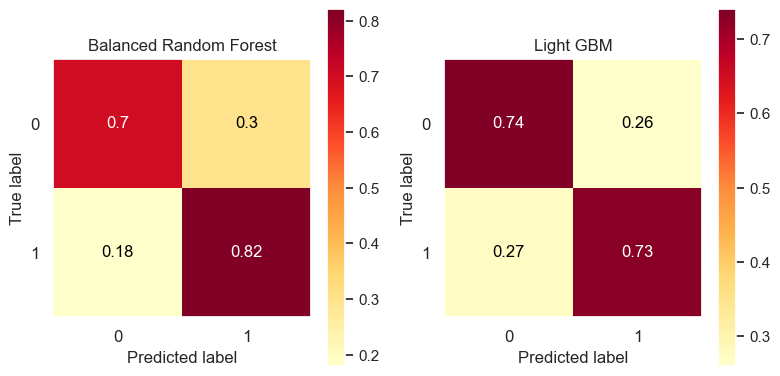

In [794]:
fig, ax = plt.subplots(1, 2, figsize=(8, 4))
skplt.metrics.plot_confusion_matrix(y_test, y_pred_brf, normalize=True, cmap='YlOrRd', ax = ax[0])
skplt.metrics.plot_confusion_matrix(y_test, y_pred_lgbm, normalize=True, cmap='YlOrRd', ax = ax[1])

ax[0].set_title("Balanced Random Forest")
ax[1].set_title("Light GBM")

plt.tight_layout();

## Conclusão

Com base nas análises realizadas, pode-se concluir que a escolha do **modelo de classificação**, do **pré-processamento** dos dados e a **técnica de balanceamento de classes** é fundamental para obter um bom desempenho no problema de Churn.

Observou-se um desempenho semelhante no conjunto de testes e no conjunto de validação. A técnica de balanceamento undersampling foi utilizada, onde somente dados da classe majoritária foram removidos. Foi escolhida a métrica **recall** como prioridade, haja vista que prever o cancelamento de clientes possibilita à empresa realizar uma intervenção e mantê-lo. Mas se for previsto um cancelamento e de fato não houver, não há danos significativos.

Dos algoritmos testados, o **Balanced Random Forest** e o **Light GBM** apresentaram um desempenho superior em termos de recall, com valores de 0,82 e 0,73, respectivamente. Isto indica a capacidade destes modelos de identificar verdadeiros positivos. O **Baseline Model**, apesar de ter uma acurácia mais elevada, apresentou um recall inferior aos modelos anteriores, reforçando a importância de se priorizar o recall neste tipo de problema. 

A precisão, por outro lado, foi mais alta para o **Baseline Model** comparada aos outros dois modelos. Contudo, como já mencionado, neste contexto específico, o recall tem maior relevância, uma vez que os custos associados a falsos negativos (clientes previstos como não-churn, mas que de fato cancelam seus contratos) são significativamente mais elevados para a empresa do que os custos associados a falsos positivos (clientes previstos como churn, mas que permanecem).
